In [88]:
# import libraries
import torch
import torch.nn as nn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
from ucimlrepo import fetch_ucirepo
from sklearn.preprocessing import MinMaxScaler

In [91]:
# fetch dataset 
occupancy_detection = fetch_ucirepo(id=357) 
  
# data (as pandas dataframes) 
X = occupancy_detection.data.features
y = occupancy_detection.data.targets 

In [92]:
X.isna().sum()

date             0
Temperature      0
Humidity         0
Light            0
CO2              0
HumidityRatio    0
dtype: int64

In [93]:
X.dtypes

date             object
Temperature      object
Humidity         object
Light            object
CO2              object
HumidityRatio    object
dtype: object

In [94]:
y.dtypes

Occupancy    float64
dtype: object

In [95]:
X

,date,Temperature,Humidity,Light,CO2,HumidityRatio
0,2015-02-04 17:51:00,23.18,27.272,426,721.25,0.00479298817650529
1,2015-02-04 17:51:59,23.15,27.2675,429.5,714,0.00478344094931065
2,2015-02-04 17:53:00,23.15,27.245,426,713.5,0.00477946352442199
3,2015-02-04 17:54:00,23.15,27.2,426,708.25,0.00477150882608175
4,2015-02-04 17:55:00,23.1,27.2,426,704.5,0.00475699293331518
...,...,...,...,...,...,...
20557,2015-02-18 09:15:00,20.815,27.7175,429.75,1505.25,0.00421296819328694
20558,2015-02-18 09:16:00,20.865,27.745,423.5,1514.5,0.00423026193160229
20559,2015-02-18 09:16:59,20.89,27.745,423.5,1521.5,0.00423681810140671
20560,2015-02-18 09:17:59,20.89,28.0225,418.75,1632,0.0042794854718673


In [100]:
y.Occupancy.unique()

array([ 1.,  0., nan])

In [108]:
df = X.copy()
df["target"] = y
df = df.dropna()
df.target.unique()

array([1., 0.])

In [117]:
X = df.drop(["date","target"],axis=1)
# Convert object columns to float, handling errors
def convert_to_float(column):
    try:
        return column.astype(float)
    except ValueError:
        return pd.to_numeric(column, errors='coerce')  # Convert invalid parsing to NaN

X = X.apply(convert_to_float)

# Check the data types after conversion
print("\nAfter conversion:")
print(X.dtypes)



After conversion:
Temperature      float64
Humidity         float64
Light            float64
CO2              float64
HumidityRatio    float64
dtype: object


In [118]:
# inspect types
print(type(X))
print(np.shape(X))
print(' ')

print(type(y))
print(np.shape(y))

<class 'pandas.core.frame.DataFrame'>
(20560, 5)
 
<class 'pandas.core.series.Series'>
(20560,)


In [119]:
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the data
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [120]:
X

,Temperature,Humidity,Light,CO2,HumidityRatio
0,0.772881,0.462624,0.250994,0.185424,0.557318
1,0.767334,0.462426,0.253056,0.181067,0.554807
2,0.767334,0.461437,0.250994,0.180766,0.553761
3,0.767334,0.459459,0.250994,0.177611,0.551669
4,0.758089,0.459459,0.250994,0.175357,0.547851
...,...,...,...,...,...
20555,0.335593,0.482202,0.253204,0.656649,0.404757
20556,0.344838,0.483410,0.249521,0.662209,0.409306
20557,0.349461,0.483410,0.249521,0.666416,0.411030
20558,0.349461,0.495605,0.246723,0.732832,0.422253


In [121]:
y = df.target
y

0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
20557    1.0
20558    1.0
20559    1.0
20560    1.0
20561    1.0
Name: target, Length: 20560, dtype: float64

In [122]:
data = torch.tensor(X.values).float()
labels = torch.tensor(y.values).float()

In [123]:
data

tensor([[0.7729, 0.4626, 0.2510, 0.1854, 0.5573],
        [0.7673, 0.4624, 0.2531, 0.1811, 0.5548],
        [0.7673, 0.4614, 0.2510, 0.1808, 0.5538],
        ...,
        [0.3495, 0.4834, 0.2495, 0.6664, 0.4110],
        [0.3495, 0.4956, 0.2467, 0.7328, 0.4223],
        [0.3698, 0.4990, 0.2410, 0.8723, 0.4331]])

In [124]:
labels

tensor([1., 1., 1.,  ..., 1., 1., 1.])

In [130]:
# Reshape labels to have the same shape as yHat
labels = labels.view(-1, 1)
labels

tensor([[1.],
        [1.],
        [1.],
        ...,
        [1.],
        [1.],
        [1.]])

labels.view(-1, 1): The view(-1, 1) operation reshapes the labels tensor to have the shape [20560, 1]. The -1 is used to automatically infer the correct size based on the number of elements, while 1 specifies that there should be one column.

In [131]:
# inspect types
print(type(data))
print(np.shape(data))
print(' ')

print(type(labels))
print(np.shape(labels))

<class 'torch.Tensor'>
torch.Size([20560, 5])
 
<class 'torch.Tensor'>
torch.Size([20560, 1])


In [132]:
# build the model
ANN_model = nn.Sequential(
    nn.Linear(5,1),   # input layer
    nn.ReLU(),        # activation unit
    nn.Linear(1,1),   # output unit
    nn.Sigmoid(),     # final activation unit (here for conceptual reasons; in practice, better to use BCEWithLogitsLoss)
      )

ANN_model

Sequential(
  (0): Linear(in_features=5, out_features=1, bias=True)
  (1): ReLU()
  (2): Linear(in_features=1, out_features=1, bias=True)
  (3): Sigmoid()
)

In [133]:
# other model features

learningRate = .01

# loss function
lossfun = nn.BCELoss()

# optimizer
optimizer = torch.optim.SGD(ANN_model.parameters(),lr=learningRate)


In [134]:
# Assuming 'data' is your input DataFrame converted to a tensor
# Ensure that the data tensor is of type float
data = data.float()
labels = labels.float()
# Check the model's dtype (should typically be float32)
print("Model dtype:", next(ANN_model.parameters()).dtype)

Model dtype: torch.float32


In [138]:
# train the model
numepochs = 1000
losses = torch.zeros(numepochs)

for epochi in range(numepochs):
    # forward pass
    yHat = ANN_model(data)
    
    # compute loss
    loss = lossfun(yHat, labels)
    losses[epochi] = loss

    # backpropagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

# After training, you can round the output for evaluation or prediction
final_output = torch.round(ANN_model(data))

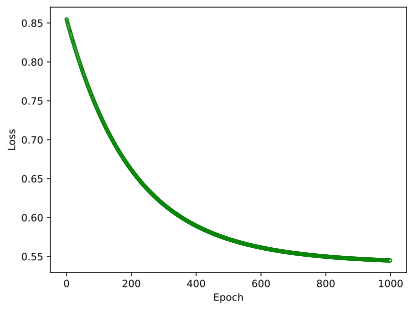

In [147]:
# show the losses

plt.plot(losses.detach(),'g.',markerfacecolor='w',linewidth=.1)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()